In [1]:
import pandas as pd
import numpy as np
import chardet 
import csv
import os
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
import seaborn as sns 
import matplotlib 
import matplotlib.pyplot as plt


In [2]:
# Identificacion de los archivos para realizar una previa normalizacion
# de los archivos csv
dirPath = os.getcwd()+"\Housing Dreams"
print(dirPath)
result = [f for f in os.listdir(dirPath) if os.path.isfile(os.path.join(dirPath, f))]
print(result)

g:\Cursos\Henry\DataScience\Hackathon\Housing Dreams
['houses_test_raw.csv', 'house_train_raw.csv']


In [3]:
def detectarEncodingDataset(path):
    filepath = Path(path)
    blob = filepath.read_bytes()
    detection = chardet.detect(blob)
    encoding = detection["encoding"]
    return encoding

In [4]:
def detectarSeparadorDataset(path):
    enc = detectarEncodingDataset(path)
    print("Path: ",path," || ", "Encoding:", enc )
    with open(path, 'r', encoding = enc, errors='ignore') as csvfile:
        dialect = csv.Sniffer().sniff(csvfile.readline(), [',',';',' ','|','/'])
        csvfile.seek(0)  
        data = csv.reader(csvfile, dialect)
    return data.dialect.delimiter

In [5]:
# Separar los archivos como un df
import os
dirPath = "Housing Dreams/"
lista1 = result
lista1.sort()
lista2 = lista1.copy()
for i, e in enumerate(lista1):
    sublista = []
    if (len(lista2) != 0):
        primerItem = lista2[0].split('.')[0].lower()
        
        for j in range(len(lista2)):
            a = " ".join(lista2[j].lower().split('.'))
            respuesta = a.find(primerItem)

            if(respuesta == 0):
                sublista.append(lista2[j])
            else:
                break
        for k in range(len(sublista)):
            lista2.remove(sublista[k])
    
    if(len(sublista) !=0):
        listan=[]
        for i in range(len(sublista)):
            listan.insert(i,'df'+str(i))
        for i in range(len(listan)):
            validar = detectarSeparadorDataset(dirPath+sublista[i])
            try:
                listan[i] = pd.read_csv(dirPath+sublista[i],sep=validar,encoding="UTF-8", decimal=",")
            except:
                listan[i] = pd.read_csv(dirPath+sublista[i],sep=validar,encoding="Latin-1", decimal=",")

        union = pd.concat(listan,ignore_index=True)
        union.to_csv("df_"+primerItem+'.csv', index=False, encoding="UTF-8")

Path:  Housing Dreams/house_train_raw.csv  ||  Encoding: ascii
Path:  Housing Dreams/houses_test_raw.csv  ||  Encoding: ascii


In [6]:
df_train = pd.read_csv("df_house_train_raw.csv")
df_test  = pd.read_csv("df_houses_test_raw.csv")
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
#Normalizacion de campos
df_train.isna().sum()
df_test.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [8]:
# Normalizacion : Se reemplazan los nulos con valores con valores NA
df_train.fillna("NA", inplace=True)

df_train['LotFrontage'].replace('NA', '0', inplace=True)
df_train['MasVnrArea'].replace('NA', '0', inplace=True) 
df_train['GarageYrBlt'].replace('NA', '0', inplace=True) 
df_train = df_train.astype({"LotFrontage":'int64', "MasVnrArea":'int64',"GarageYrBlt":"int64"}) 

In [9]:
df_test.fillna("NA", inplace=True)
df_test['LotFrontage'].replace('NA', '0', inplace=True)
df_test['MasVnrArea'].replace('NA', '0', inplace=True) 
df_test['GarageYrBlt'].replace('NA', '0', inplace=True) 
df_test['BsmtFinSF1'].replace('NA', '0', inplace=True) 
df_test['MasVnrArea'].replace('NA', '0', inplace=True) 
df_test['BsmtFinSF2'].replace('NA', '0', inplace=True) 
df_test['BsmtUnfSF'].replace('NA', '0', inplace=True) 
df_test['TotalBsmtSF'].replace('NA', '0', inplace=True) 
df_test['BsmtFullBath'].replace('NA', '0', inplace=True) 
df_test['BsmtHalfBath'].replace('NA', '0', inplace=True) 
df_test['GarageCars'].replace('NA', '0', inplace=True) 
df_test['GarageArea'].replace('NA', '0', inplace=True) 



In [10]:
df_test_final= df_test[['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea',
'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
'GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
'PoolArea','MiscVal','MoSold','YrSold']]

In [11]:
# Variable para identificar los parametros de RandomForestClassifier
bosque = RandomForestClassifier()
bosque.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [12]:
# Seleccion de los campos numericos a utilizarse para el entrenamiento y pruebas
# df_train_numerico = contiene todos los campos que he considerado para el entrenamiento
# df_independientes = contiene todos los campos independientes del train
# df_dependientes   = contiene el campo a predecir
df_train_numerico = df_train[['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea',
                             'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                             'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath',
                             'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
                             'GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                             'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal',
                             'MoSold','YrSold','SalePrice']]
                             

df_independientes =  df_train_numerico[['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea',
                             'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                             'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath',
                             'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
                             'GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                             'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal',
                             'MoSold','YrSold']]

df_dependientes =  df_train_numerico[['SalePrice']]

In [13]:
# Utilizacion de train_test_split con las variables X y Y generadas en la parte anterior; con un tamaños de prueba
X_train, X_test, y_train, y_test = train_test_split(df_independientes, df_dependientes, test_size=0.33)

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


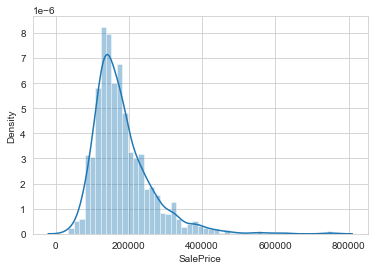

C:\Users\User\AppData\Local\Temp\ipykernel_11232\2898961221.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_numerico['SalePrice_log'] = np.log(df_train_numerico.SalePrice)
c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


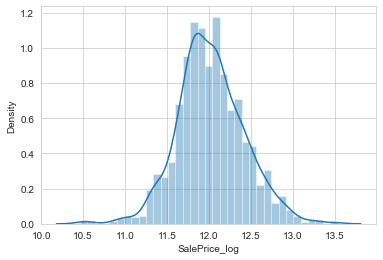

In [14]:
# Grafico que muestra el Comportamiento de SalesPrice y su logaritmo
# La distribución de los precios de venta está sesgada a la derecha, algo que se espera. 
# En su vecindario, puede que no sea inusual ver algunas casas que son relativamente caras.
# Aplico una transformación logarítmica al precio de venta para comprimir los valores atípicos y hacer que la distribución sea normal

x = df_train_numerico.SalePrice
sns.set_style('whitegrid')
sns.distplot(x)
plt.show()

df_train_numerico['SalePrice_log'] = np.log(df_train_numerico.SalePrice)
x = df_train_numerico.SalePrice_log
sns.distplot(x)
plt.show()

<AxesSubplot:>

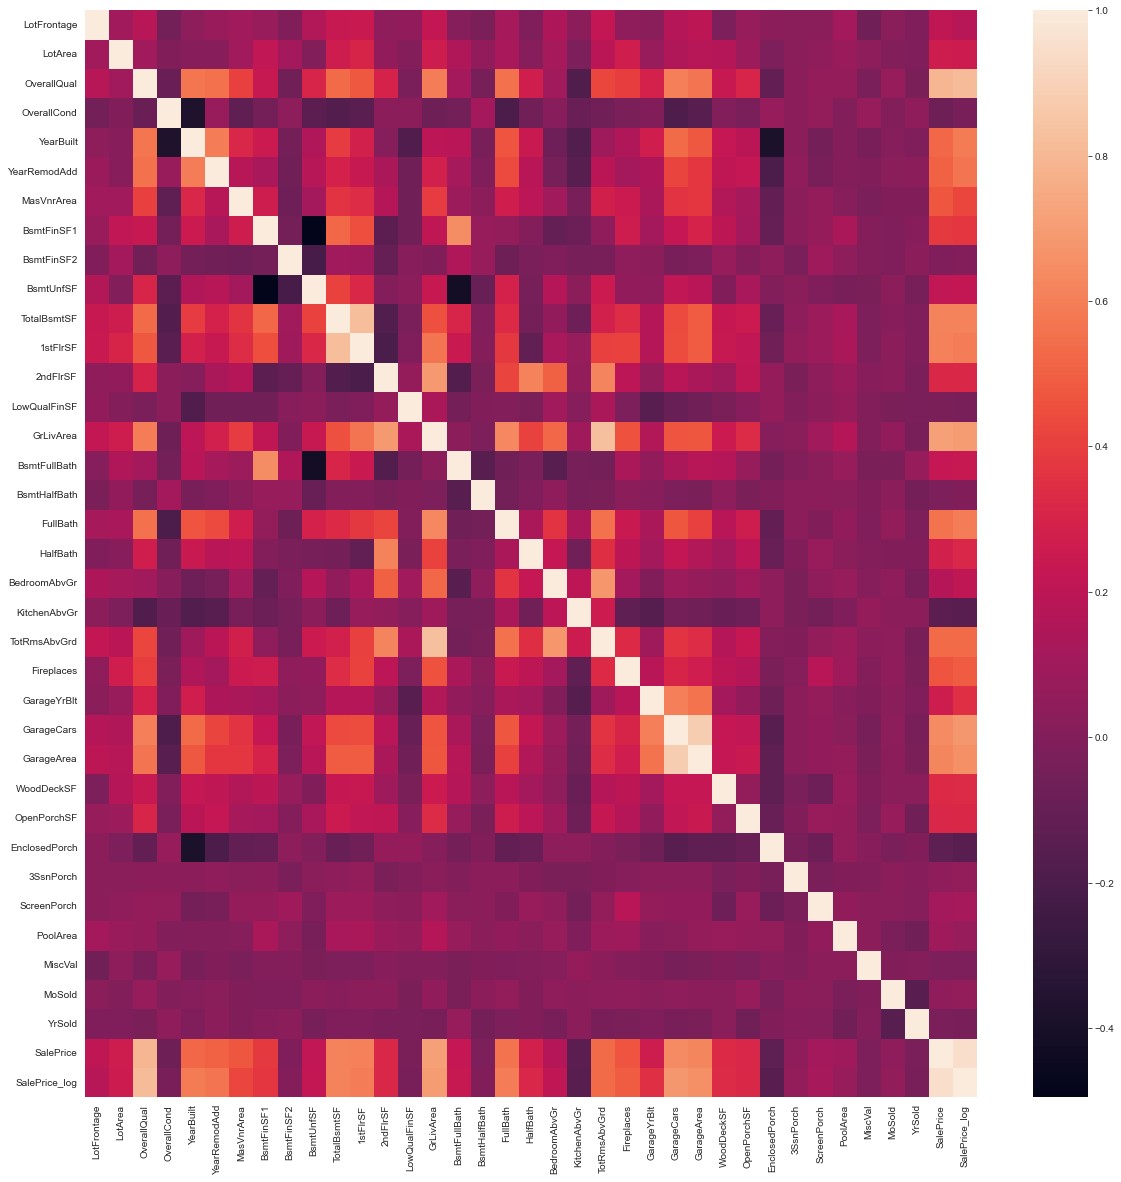

In [15]:
# Grafico de Correlaciones : trazo una matriz de correlación para darme una idea de las relaciones
# que existen en los datos. También me ayuda en la construcción del modelo. Queriendo decir, si veo que muchas  
# características están correlacionadas entre sí, es posible que desee evitar la regresión lineal.

plt.figure(figsize=(20,20))
sns.heatmap(df_train_numerico.corr())

In [16]:
# Busqueda de Cuadricula o Rejilla utilizando GridSearchCV que me servira generar los posibles mejores
# estimaciones y la utilizado para automatizar la selección de los parámetros de mi modelo.
# Aplicando para ello la técnica de validación cruzada
# criterion    : dos potenciales criterios de inpureza para explorar
# n_estimators : cuanto arboles se van a conforma mi bosque aleatorio
# max_samples  : porcentaje de datos a ser usados en los muestreos

from sklearn.model_selection import GridSearchCV

parametros = {"criterion": ("gini", "entropy"),
              'n_estimators':[200, 300, 400, 500, 600],
              # 'max_features':[0.1, 0.3, 0.6]
              #"n_estimators" : (70,80,90,100), 
              "max_samples" : (1/3, 2/3, 3/3)}

#Ejemplos de metricas scoring = "accuracy", "recall", "roc_auc", etc. neg_mean_squared_log_error

rejilla = GridSearchCV(bosque, 
                       parametros, 
                       scoring="neg_mean_squared_log_error",
                       cv=5)

rejilla.fit(df_train_numerico[df_train_numerico.columns[:-1]].values, 
            df_train_numerico["SalePrice"].values)

c:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_samples': (0.3333333333333333, 0.6666666666666666,
                                         1.0),
                         'n_estimators': [200, 300, 400, 500, 600]},
             scoring='neg_mean_squared_log_error')

In [17]:
# Ordenamiento de los parametros
sorted(rejilla.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_criterion',
 'param_max_samples',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [18]:
# Visualizacion del comportamiento de los modelos en funcion de sus parametros
rejilla.cv_results_["params"]

[{'criterion': 'gini', 'max_samples': 0.3333333333333333, 'n_estimators': 200},
 {'criterion': 'gini', 'max_samples': 0.3333333333333333, 'n_estimators': 300},
 {'criterion': 'gini', 'max_samples': 0.3333333333333333, 'n_estimators': 400},
 {'criterion': 'gini', 'max_samples': 0.3333333333333333, 'n_estimators': 500},
 {'criterion': 'gini', 'max_samples': 0.3333333333333333, 'n_estimators': 600},
 {'criterion': 'gini', 'max_samples': 0.6666666666666666, 'n_estimators': 200},
 {'criterion': 'gini', 'max_samples': 0.6666666666666666, 'n_estimators': 300},
 {'criterion': 'gini', 'max_samples': 0.6666666666666666, 'n_estimators': 400},
 {'criterion': 'gini', 'max_samples': 0.6666666666666666, 'n_estimators': 500},
 {'criterion': 'gini', 'max_samples': 0.6666666666666666, 'n_estimators': 600},
 {'criterion': 'gini', 'max_samples': 1.0, 'n_estimators': 200},
 {'criterion': 'gini', 'max_samples': 1.0, 'n_estimators': 300},
 {'criterion': 'gini', 'max_samples': 1.0, 'n_estimators': 400},
 {'cr

In [19]:
# Metrica que me bninda el ranking de puntales de test
print(rejilla.cv_results_["rank_test_score"])
# El ranking proviene del promedio de la evaluaciones de datos de prueba
print(rejilla.cv_results_["mean_test_score"])
# El mejor resultado en funcion de la metrica utilizada : accuracy

print("El Mejor Score es :" ,rejilla.best_score_)

# Los mejores parametros que dieron el mejor resultado
print("Los Mejores Parametros son :",rejilla.best_params_)

[29 26  7 17 20  9 14  2  4  3 10  6  1  5  8 30 27 25 28 19 24 18 11 21
 16 23 15 12 13 22]
[-0.01729092 -0.01699921 -0.01426602 -0.01511871 -0.01566405 -0.01442623
 -0.01452453 -0.01279148 -0.01359868 -0.01286873 -0.01443856 -0.01417791
 -0.01241364 -0.01413992 -0.01431164 -0.01759996 -0.01722494 -0.01652863
 -0.01722638 -0.01542429 -0.01592384 -0.01533261 -0.01448889 -0.01573457
 -0.01506131 -0.01579936 -0.01476447 -0.01448911 -0.01452038 -0.01575626]
El Mejor Score es : -0.012413640921474678
Los Mejores Parametros son : {'criterion': 'gini', 'max_samples': 1.0, 'n_estimators': 400}


In [20]:
# random forest classifier -> Clasificador Aleatorio
bosque2 = RandomForestClassifier(criterion= 'gini', max_samples= 1.0, n_estimators = 400)
bosque2

RandomForestClassifier(max_samples=1.0, n_estimators=400)

In [21]:
# entrenamiento del resultado de bosque2
bosque2.fit(X_train, y_train)
predic      = bosque2.predict(X_test)
# Mensaje del mse
print("El error es  :", mean_squared_log_error(y_test, predic, squared=False))

C:\Users\User\AppData\Local\Temp\ipykernel_11232\1635365124.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  bosque2.fit(X_train, y_train)


El error es  : 0.18865672255762184


In [22]:
predic_test = bosque2.predict(df_test_final)
pd.DataFrame(predic_test, columns=['SalePrice']).to_csv("pred_test.csv", index=False, sep=",")